In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from pandas.plotting import parallel_coordinates
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

## **Figure 5. Difficulty of Detecting Anomalies in Time-Series Data**

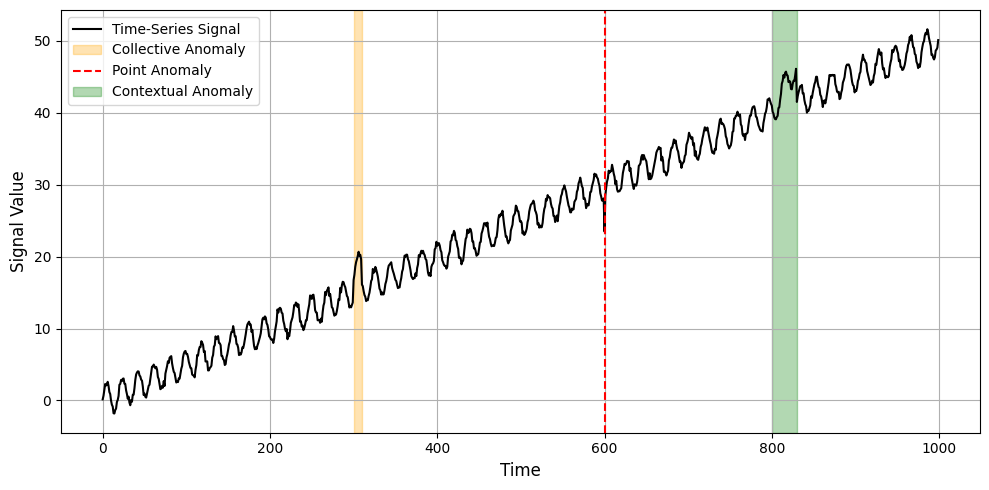

In [7]:
np.random.seed(42)
t = np.arange(1000)

# Base trend with a seasonal component
signal = 0.05 * t + np.sin(t / 3) * 2

# Random noise (simulates natural variation)
signal += np.random.normal(0, 0.3, size=len(t))

signal[300:310] += 3                     # Collective anomaly (sudden upward drift)
signal[600] -= 5                         # Point anomaly (sharp isolated drop)
signal[800:830] += np.linspace(0, 5, 30) # Contextual anomaly (gradual shift)

plt.figure(figsize=(10, 5))
plt.plot(t, signal, label="Time-Series Signal", color='black')
plt.axvspan(300, 310, color='orange', alpha=0.3, label='Collective Anomaly')
plt.axvline(600, color='red', linestyle='--', label='Point Anomaly')
plt.axvspan(800, 830, color='green', alpha=0.3, label='Contextual Anomaly')

# plt.title("Demonstrating the Difficulty of Detecting Anomalies in Time-Series Data", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal Value", fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


## **Figure 6. ROC Curves for Various AUC Values**

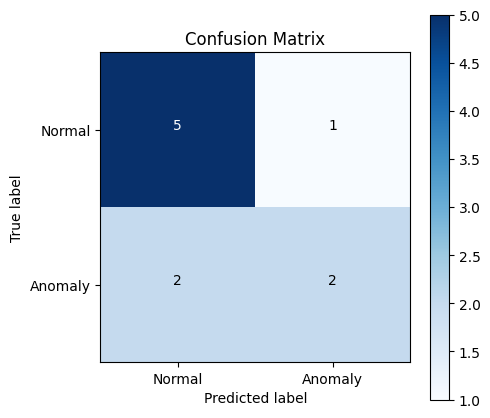

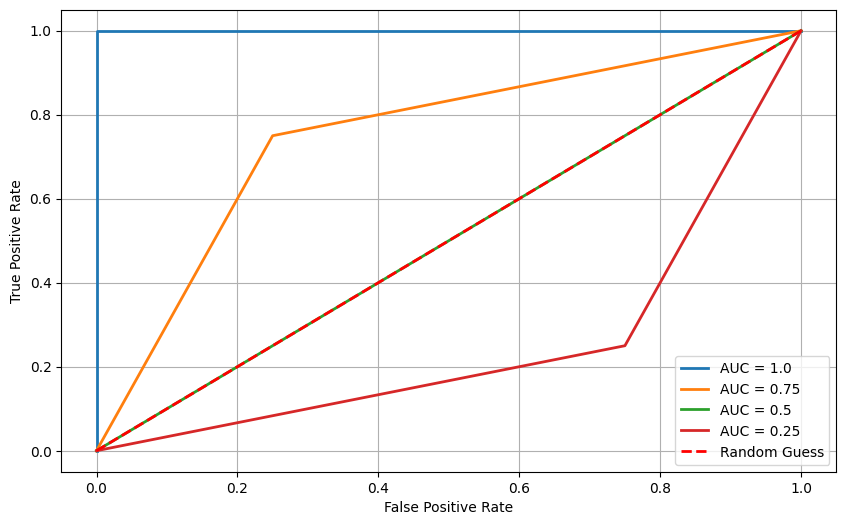

In [ ]:
cm = np.array([[5, 1],
               [2, 2]])

# Plot confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['Normal', 'Anomaly']
plt.xticks([0,1], classes)
plt.yticks([0,1], classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Sample ROC curves with different AUCs
auc_values = [1.0, 0.75, 0.5, 0.25]
plt.figure(figsize=(10,6))

for idx, auc_val in enumerate(auc_values):
    # Simulate fpr and tpr
    if auc_val == 1.0:
        fpr = [0, 0, 1]
        tpr = [0, 1, 1]
    elif auc_val == 0.75:
        fpr = [0, 0.25, 1]
        tpr = [0, 0.75, 1]
    elif auc_val == 0.5:
        fpr = [0, 0.5, 1]
        tpr = [0, 0.5, 1]
    elif auc_val == 0.25:
        fpr = [0, 0.75, 1]
        tpr = [0, 0.25, 1]

    plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc_val}')

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Various AUC Values')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## **Figure 7. Precision-recall curve**

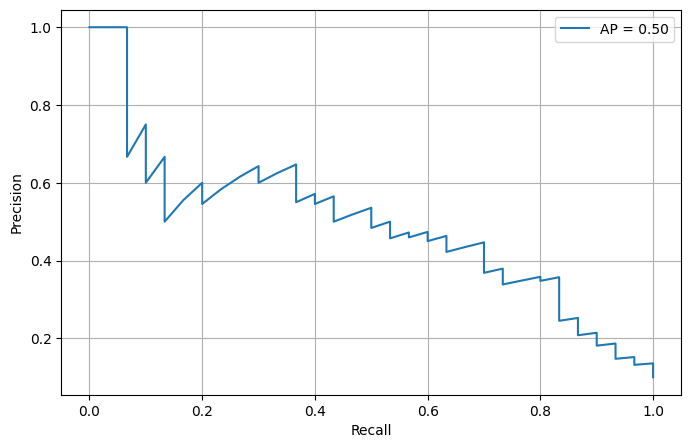

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8,5))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


## **Figure 8. Bias–Variance Trade-off**

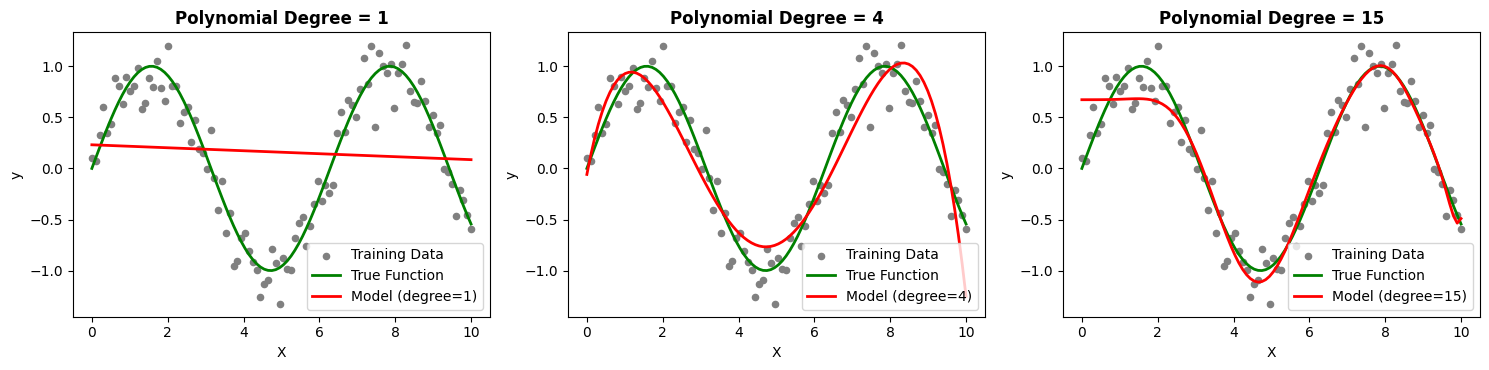

In [ ]:
np.random.seed(42)

X = np.linspace(0, 10, 100)
y_true = np.sin(X)
y = y_true + np.random.normal(0, 0.2, size=X.shape)

# Polynomial degrees representing model complexity
degrees = [1, 4, 15]

plt.figure(figsize=(15, 4))

for i, d in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X.reshape(-1, 1))

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='gray', s=20, label='Training Data')
    plt.plot(X, y_true, color='green', linewidth=2, label='True Function')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Model (degree={d})')
    plt.title(f"Polynomial Degree = {d}", fontsize=12, fontweight='bold')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.suptitle("Bias–Variance Trade-off Demonstration")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## **Figure 9. Bias–Variance Trade-off displaying optimal complexity**

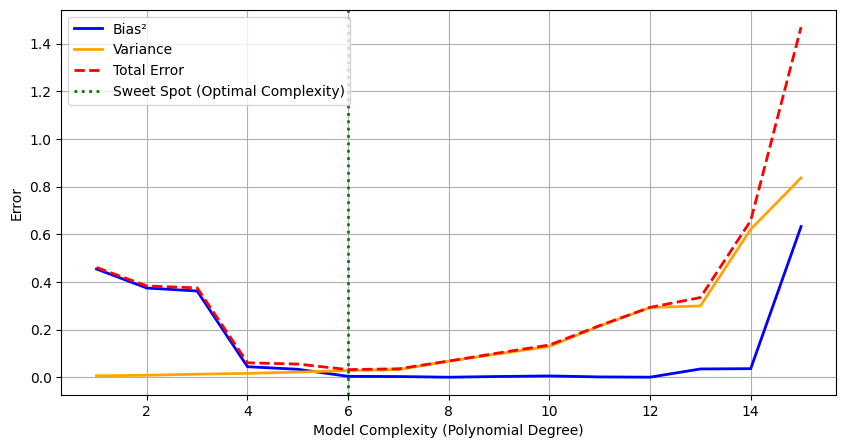

In [ ]:
np.random.seed(42)

def true_function(x):
    return np.sin(x)

X_train = np.sort(np.random.rand(30) * 10)
y_train = true_function(X_train) + np.random.normal(0, 0.3, size=X_train.shape)

X_val = np.linspace(0, 10, 100)
y_val_true = true_function(X_val)

degrees = range(1, 16)
train_errors, val_errors = [], []
bias_squared, variance = [], []

for d in degrees:
    preds = []
    for _ in range(50):
        # Add random noise each time
        y_train_noise = true_function(X_train) + np.random.normal(0, 0.3, size=X_train.shape)
        model = make_pipeline(PolynomialFeatures(d), LinearRegression())
        model.fit(X_train.reshape(-1, 1), y_train_noise)
        preds.append(model.predict(X_val.reshape(-1, 1)))

    preds = np.array(preds)
    mean_pred = np.mean(preds, axis=0)

    # Bias² = (true - mean prediction)²
    b2 = np.mean((y_val_true - mean_pred) ** 2)
    # Variance = average of prediction variance
    v = np.mean(np.var(preds, axis=0))
    # Irreducible noise (not shown here)

    bias_squared.append(b2)
    variance.append(v)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train.reshape(-1, 1), y_train)
    train_pred = model.predict(X_train.reshape(-1, 1))
    val_pred = model.predict(X_val.reshape(-1, 1))
    train_errors.append(mean_squared_error(y_train, train_pred))
    val_errors.append(mean_squared_error(y_val_true, val_pred))

bias_squared, variance = np.array(bias_squared), np.array(variance)
total_error = bias_squared + variance

plt.figure(figsize=(10,5))
plt.plot(degrees, bias_squared, label='Bias²', color='blue', linewidth=2)
plt.plot(degrees, variance, label='Variance', color='orange', linewidth=2)
plt.plot(degrees, total_error, label='Total Error', color='red', linewidth=2, linestyle='--')
plt.axvline(x=degrees[np.argmin(total_error)], color='green', linestyle=':', linewidth=2,
            label='Sweet Spot (Optimal Complexity)')

# plt.title("Bias–Variance Trade-off (Synthetic Data)", fontsize=14, fontweight='bold')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()


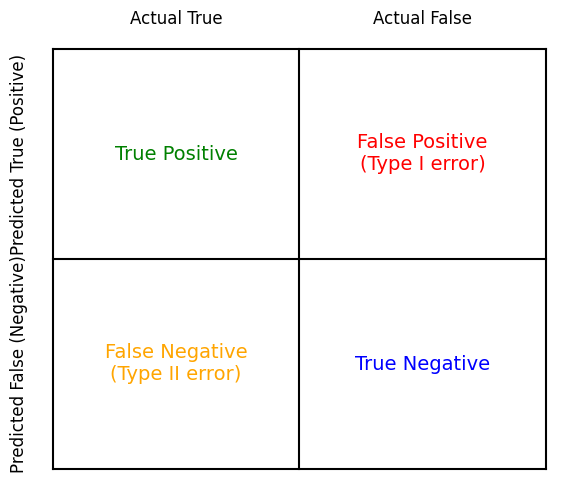

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.axis('off')

for i in range(3):
    ax.plot([0, 2], [i, i], color='black')
    ax.plot([i, i], [0, 2], color='black')

ax.text(0.5, 2.1, 'Actual True', ha='center', va='bottom', fontsize=12)
ax.text(1.5, 2.1, 'Actual False', ha='center', va='bottom', fontsize=12)
ax.text(-0.1, 1.5, 'Predicted True (Positive)', ha='right', va='center', fontsize=12, rotation=90)
ax.text(-0.1, 0.5, 'Predicted False (Negative)', ha='right', va='center', fontsize=12, rotation=90)

ax.text(0.5, 1.5, 'True Positive', ha='center', va='center', fontsize=14, color='green')
ax.text(1.5, 1.5, 'False Positive\n(Type I error)', ha='center', va='center', fontsize=14, color='red')
ax.text(0.5, 0.5, 'False Negative\n(Type II error)', ha='center', va='center', fontsize=14, color='orange')
ax.text(1.5, 0.5, 'True Negative', ha='center', va='center', fontsize=14, color='blue')

# plt.title('Confusion Matrix with Type I and Type II Errors', fontsize=16, pad=20)
plt.show()


Confusion Matrix:
 [[4 1]
 [1 4]]
Precision: 0.80, Recall: 0.80, F1 Score: 0.80


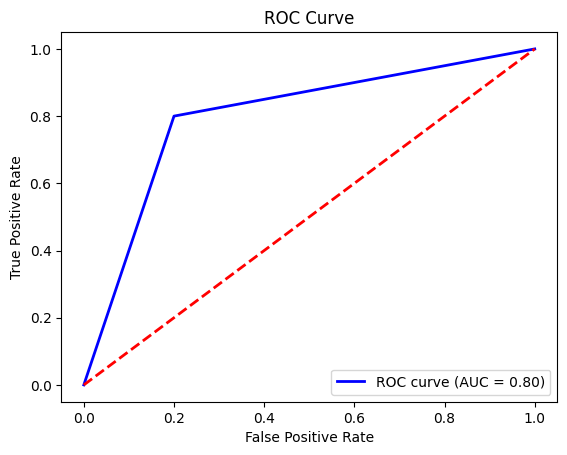

In [ ]:
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## **Figure 12. Comparison of Factor Loadings: OLS vs Ridge vs Lasso**

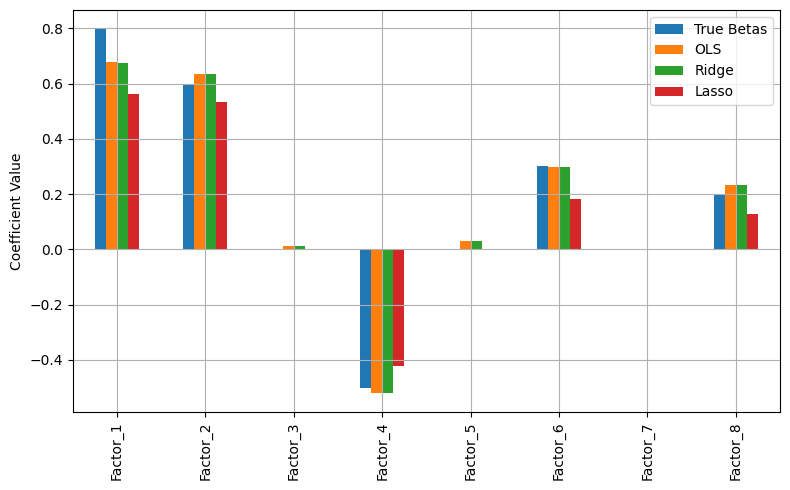

,True Betas,OLS,Ridge,Lasso
Factor_1,0.8,0.678307,0.675457,0.560917
Factor_2,0.6,0.636146,0.633521,0.534736
Factor_3,0.0,0.010960,0.010678,-0.000000
Factor_4,-0.5,-0.521178,-0.519010,-0.422668
Factor_5,0.0,0.029316,0.029495,0.000000
Factor_6,0.3,0.297998,0.296441,0.181453
Factor_7,0.0,-0.002310,-0.002396,-0.000000
Factor_8,0.2,0.234293,0.233214,0.128718


In [ ]:
np.random.seed(42)

n_obs = 250
n_factors = 8
n_assets = 1

# Simulate factor returns
factors = np.random.normal(0, 1, size=(n_obs, n_factors))
true_betas = np.array([0.8, 0.6, 0.0, -0.5, 0.0, 0.3, 0.0, 0.2])  # only some factors matter
alpha = 0.02
noise = np.random.normal(0, 0.5, size=n_obs)

# Generate asset excess returns
y = alpha + factors @ true_betas + noise

scaler = StandardScaler()
X_scaled = scaler.fit_transform(factors)

ols = LinearRegression().fit(X_scaled, y)
ridge = Ridge(alpha=1.0).fit(X_scaled, y)
lasso = Lasso(alpha=0.1).fit(X_scaled, y)

coeffs = pd.DataFrame({
    'True Betas': true_betas,
    'OLS': ols.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}, index=[f'Factor_{i+1}' for i in range(n_factors)])

coeffs.plot(kind='bar', figsize=(8, 5))
# plt.title('Comparison of Factor Loadings: OLS vs Ridge vs Lasso')
plt.ylabel('Coefficient Value')
plt.grid()
plt.tight_layout()
plt.show()

coeffs


## **Figure 13. Ridge Regression Coefficient Path, Figure 14. Lasso Regression Coefficient Path**

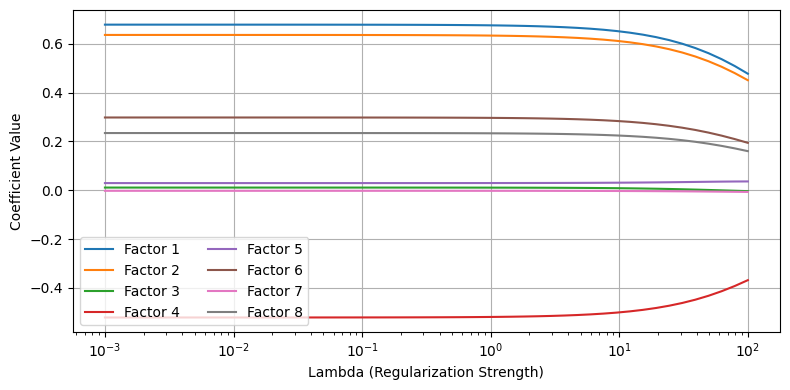

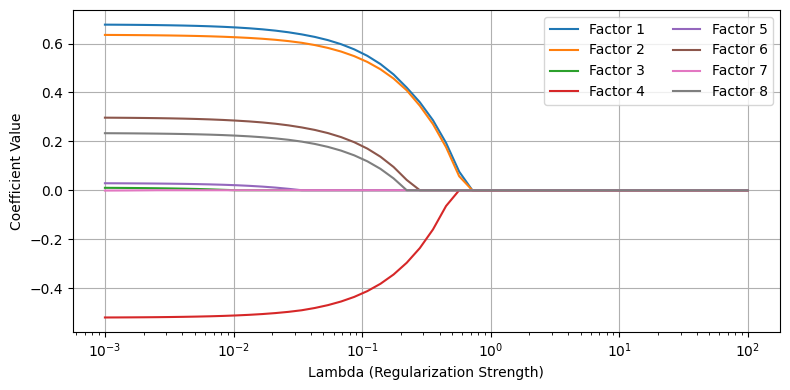

In [ ]:
# Define a range of penalty parameters (λ)
alphas = np.logspace(-3, 2, 50)

ridge_coefs = []
lasso_coefs = []

# Loop through different alpha values
for a in alphas:
    ridge = Ridge(alpha=a).fit(X_scaled, y)
    lasso = Lasso(alpha=a, max_iter=10000).fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Ridge coefficient path
plt.figure(figsize=(8, 4))
for i in range(n_factors):
    plt.plot(alphas, ridge_coefs[:, i], label=f'Factor {i+1}')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Coefficient Value')
# plt.title('Ridge Regression Coefficient Path')
plt.grid()
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

# Lasso coefficient path
plt.figure(figsize=(8, 4))
for i in range(n_factors):
    plt.plot(alphas, lasso_coefs[:, i], label=f'Factor {i+1}')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Coefficient Value')
# plt.title('Lasso Regression Coefficient Path')
plt.grid()
plt.legend(ncol=2)
plt.tight_layout()
plt.show()
